# Boston house prices dataset

## Sections

 - [Description](#Description)
   - [Context](#Context)
   - [Content](#Content)
   - [Attribute Information](#Attribute-Information)
   - [Acknowledgements](#Acknowledgements)
 - [Loading dataframe](#Loading-dataframe)
 - [Model pipeline](#Model-pipeline)
   - [Accuracy](#Accuracy)
   - [Root mean squared error](#Root-mean-squared-error)

## Description

### Context

This is a Data Set from UCI Machine Learning Repository which concerns housing values in suburbs of Boston.

### Content

Number of Instances: 506

### Attribute Information:

 * `CRIM`: per capita crime rate by town
 * `ZN`: proportion of residential land zoned for lots over 25,000 sq.ft.
 * `INDUS`: proportion of non-retail business acres per town
 * `CHAS`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 * `NOX`: nitric oxides concentration (parts per 10 million)
 * `RM`: average number of rooms per dwelling
 * `AGE`: proportion of owner\-occupied units built prior to 1940
 * `DIS`: weighted distances to five Boston employment centres
 * `RAD`: index of accessibility to radial highways
 * `TAX`: full\-value property\-tax rate per \$10\,000
 * `PTRATIO`: pupil\-teacher ratio by town
 * `B`: `1000*(Bk - 0.63)^2` where `Bk` is the proportion of blacks by town
 * `LSTAT`: \% lower status of the population
 * `MEDV`: median value of owner\-occupied homes in \$1000\'s

Missing Attribute Values: None

### Acknowledgements

Source: https://archive.ics.uci.edu/ml/datasets/Housing 

Origin: This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. 

Creator: Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

## Loading dataframe

In [4]:
import json, re
raw_attrib = json.dumps(boston.DESCR).split('\\n\\n')[5].split('\\n')
attrib = []
for num in range(1, len(raw_attrib)):
    attrib.append(re.split('\\s+', raw_attrib[num])[2])

In [5]:
X = pd.DataFrame(boston.data, columns=attrib[:-1])
y = pd.Series(boston.target)

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
X.describe().applymap('{:.2f}'.format)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97


In [9]:
sns.set(style="whitegrid", color_codes=True)

def sns_pairgrid_plot(start_col, end_col):
    g = sns.PairGrid(X, x_vars=attrib[start_col:end_col], y_vars=attrib[:-1])
    g = g.map(plt.scatter, alpha=0.2, s=7, color='blue')
    xlabels, ylabels = [], []
    label_font_size = 12

    for ax in g.axes[-1,:]:
        xlabel = ax.xaxis.get_label_text()
        xlabels.append(xlabel)
    for ax in g.axes[:,0]:
        ylabel = ax.yaxis.get_label_text()
        ylabels.append(ylabel)

    for i in range(len(xlabels)):
        for j in range(len(ylabels)):
            g.axes[j, i].xaxis.set_label_text(xlabels[i])
            g.axes[j, i].xaxis.label.set_size(label_font_size)
            g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
            g.axes[j, i].yaxis.set_label_text(ylabels[j])
            g.axes[j, i].yaxis.label.set_size(label_font_size)
            g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

    plt.tight_layout();

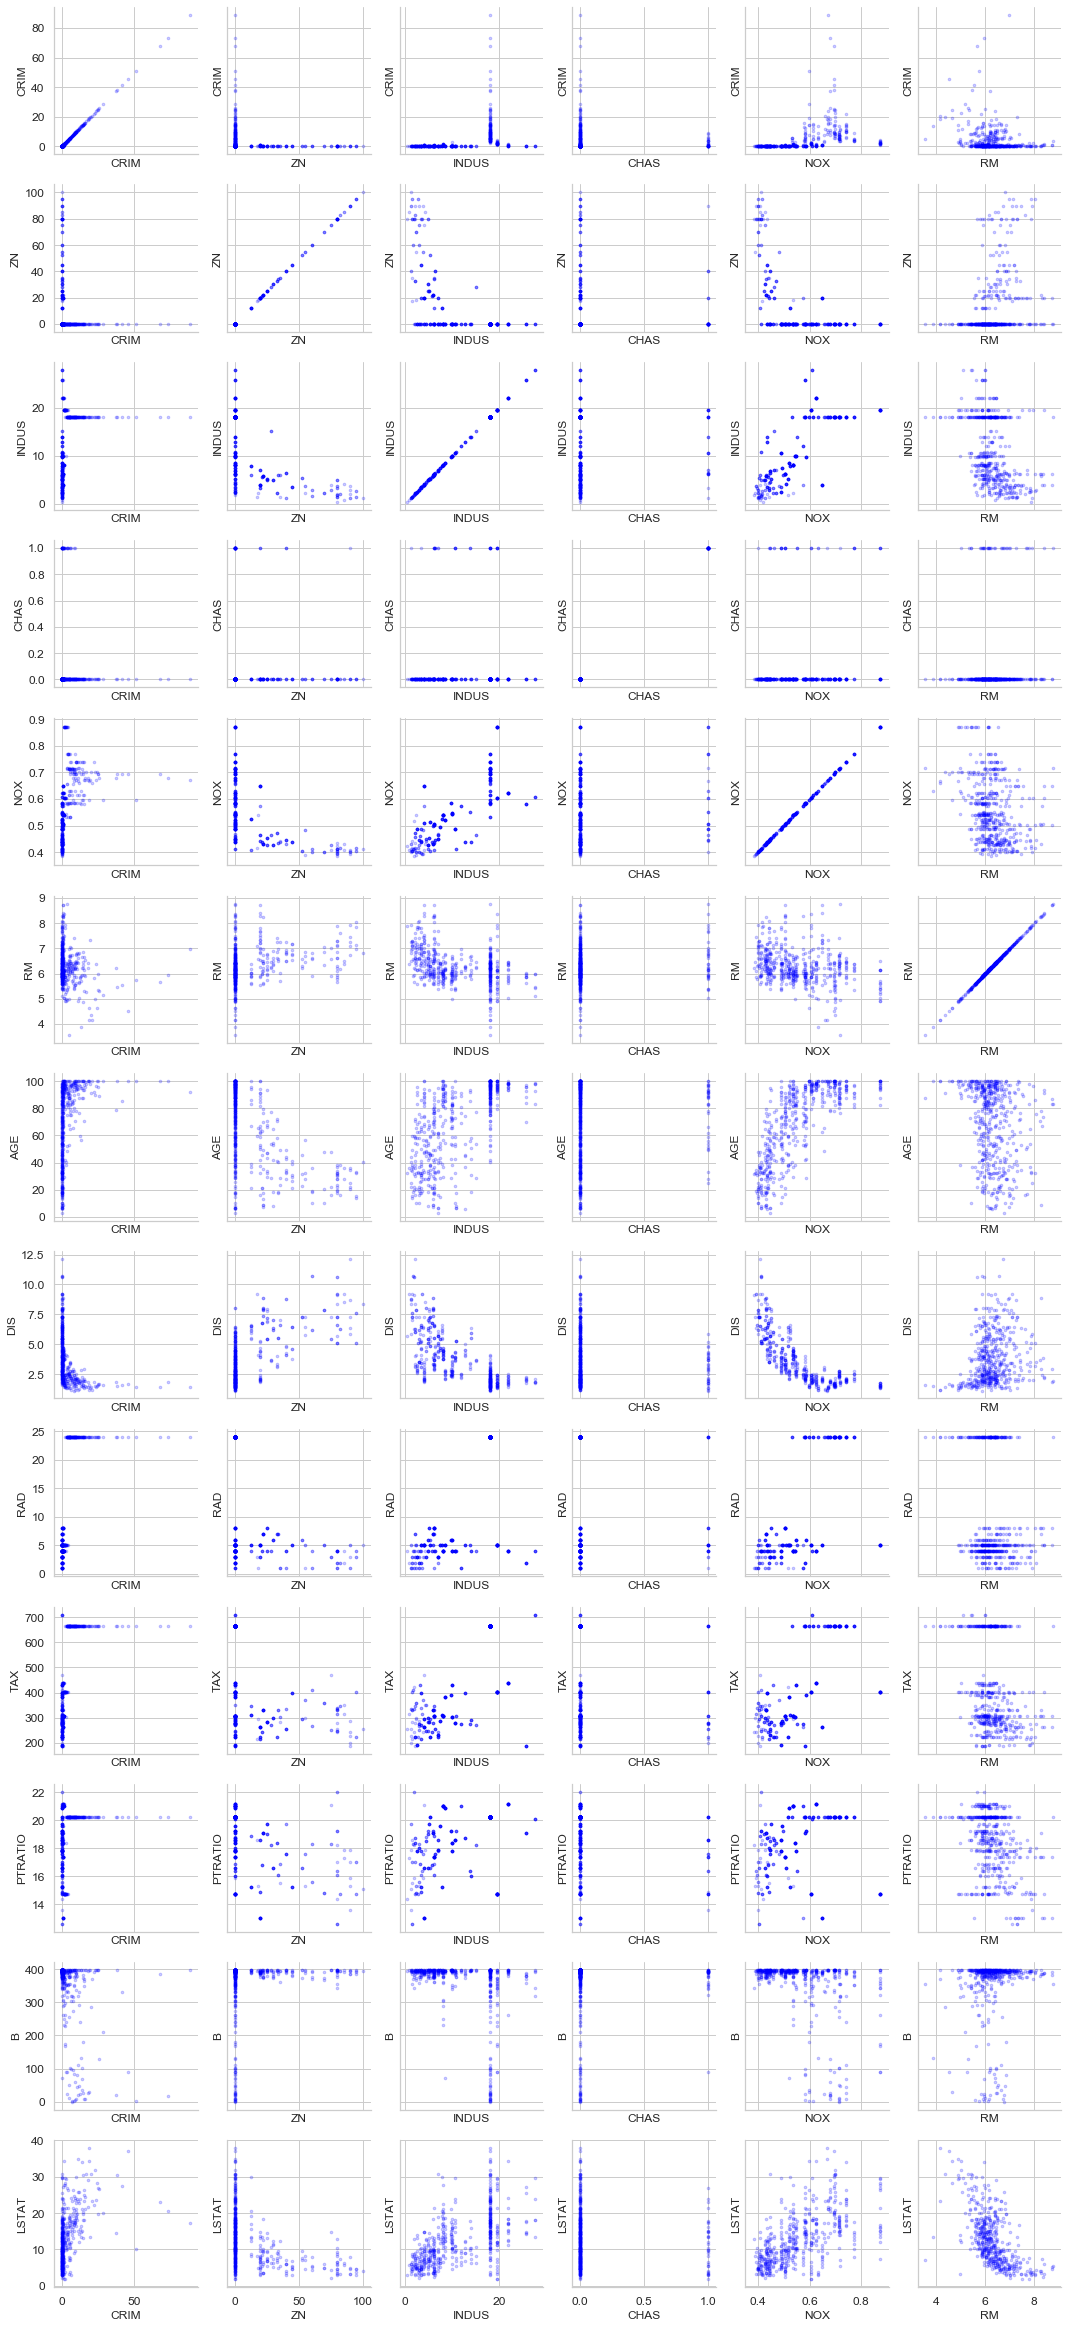

In [10]:
sns_pairgrid_plot(0, 6)

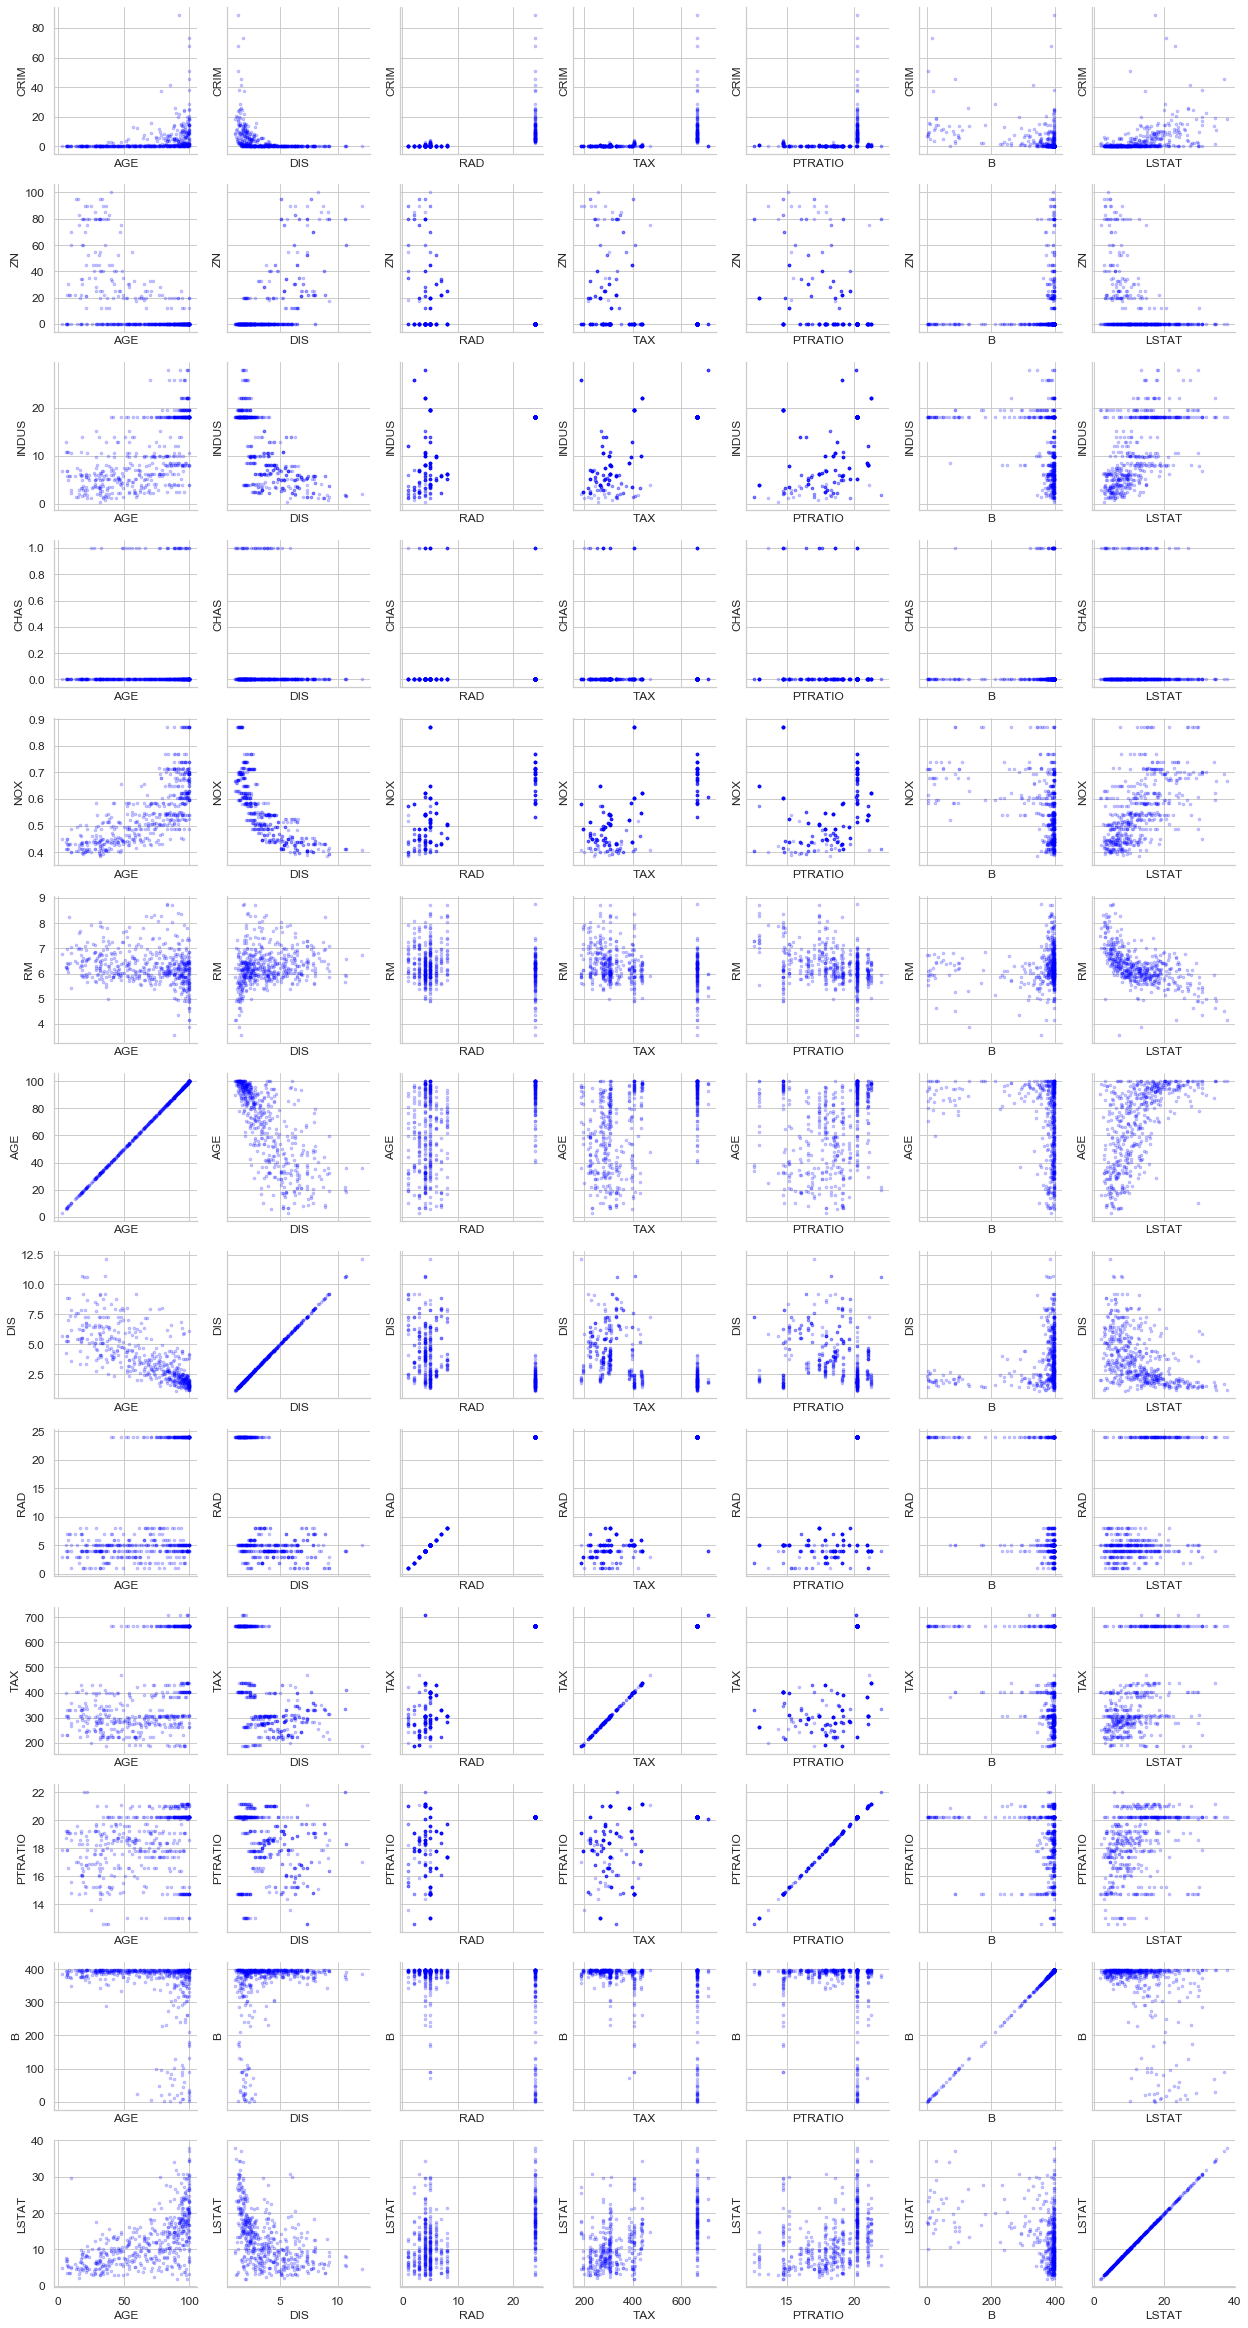

In [11]:
sns_pairgrid_plot(6, -1)

## Model pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [13]:
cat_attrib = [attrib[3]] # just the CHAS column
num_attrib = list(attrib[0:3] + attrib[4:-1])

In [15]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])
full_pipeline = ColumnTransformer([('num', num_pipeline, num_attrib), \
                                   ('cat', OneHotEncoder(categories='auto'), cat_attrib)])

In [17]:
X_prepared = full_pipeline.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_prepared, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 14), (152, 14), (354,), (152,))

In [76]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures

In [82]:
model_dict = {'Linear regression': LinearRegression(), \
              'Stochastic gradient descent': SGDRegressor(max_iter=100000, tol=1e-04, penalty=None, eta0=0.005), \
#               'Polynomial features': PolynomialFeatures(degree=2, include_bias=False), \
              'Lasso regression': Lasso(alpha=0.01), \
              'Ridge regression': Ridge(alpha=0.01, solver='cholesky'), \
              'Elastic Net regression': ElasticNet(alpha=0.1, l1_ratio=0.5)} 

### Accuracy

In [83]:
import joblib
from time import time
t0 = time()
y_pred_results = []
for name, model in model_dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_results.append(y_pred)
    joblib.dump(model, '_'.join(name.lower().split(' '))+'.pkl')
    print(f'Accuracy of the {name.lower()} on test set: {model.score(X_test, y_test):.5f}')
print(f'Time elapsed: {(time() - t0):.3f} seconds')

Accuracy of the linear regression on test set: 0.71123
Accuracy of the stochastic gradient descent on test set: 0.70980
Accuracy of the lasso regression on test set: 0.71078
Accuracy of the ridge regression on test set: 0.71122
Accuracy of the elastic net regression on test set: 0.70075
Time elapsed: 0.019 seconds


### Root mean squared error

In [84]:
from sklearn.metrics import mean_squared_error, r2_score
for (name, model), y_pred in zip(model_dict.items(), y_pred_results):
    mse = mean_squared_error(y_test, y_pred)
    print(f'Root mean square error for the {name.lower():s} model: {np.sqrt(mse):.3f}')

Root mean square error for the linear regression model: 4.639
Root mean square error for the stochastic gradient descent model: 4.650
Root mean square error for the lasso regression model: 4.642
Root mean square error for the ridge regression model: 4.639
Root mean square error for the elastic net regression model: 4.722
